ML Course, Bogotá, Colombia  (&copy; Josh Bloom; June 2019)

In [1]:
%run ../talktools.py

<div class="alert alert-info">sklearn is not built for deep/complex networks such as required in covnets (as we'll see later on). We must go to specialized software (and potentially specialized hardware)</div>


# Deep Learning Frameworks

Almost all frameworks written in low-level C++/C with Python (or other scripting bindings)

### Low-level frameworks

   - Tensorflow (Google) Nov 2015
   - Theano
   - Caffe (Berkeley)
   - Torch (Lua)
   - pytorch (Python)
   - CNTK (Microsoft)
   - Chainer
   - PaddlePaddle (Baidu) Aug 2016
   
### High level frameworks (Python)

   - Keras (atop Tensorflow, Theano)
   - TFLearn 
   - nolearn
   - SkFlow (part of tensorflow)
   - [Lasagne](http://lasagne.readthedocs.io/en/latest/index.html) (atop Theano)
   
<img src="https://pbs.twimg.com/media/DX0lfBNU8AEs8KG.png:large" width="75%">
Source: https://twitter.com/fchollet/status/971863128341323776

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">TensorFlow is the platform of choice for deep learning in the research community. These are deep learning framework mentions on arXiv over the past 3 months <img src="https://pbs.twimg.com/media/DXy_uc0VAAAIhKG.jpg:small">

&mdash; François Chollet (@fchollet) <a href="https://twitter.com/fchollet/status/971863128341323776?ref_src=twsrc%5Etfw">March 8, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


see also: https://github.com/mbadry1/Top-Deep-Learning

# Keras

Let's load up the California housing data as in the previous notebook.

In [2]:
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler  


cal_house = datasets.california_housing
cal_data = cal_house.fetch_california_housing()
X = cal_data['data']   # 8 features 
Y = cal_data['target'] # response (median house price)

half = math.floor(len(Y)/2)
train_X = X[:half]
train_Y = Y[:half]
test_X = X[half:]
test_Y = Y[half:]


scaler = StandardScaler()  

# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  

# apply same transformation to test data
test_X = scaler.transform(test_X)

In [3]:
num_input_features = train_X.shape[1]
print(f'number of input features = {num_input_features}')

number of input features = 8


In [4]:
# Import TensorFlow and tf.keras
import tensorflow as tf
import keras
#from tensorflow import keras

from keras.models import Sequential  # linear stack of layers
from keras.layers import Dense, Activation

#from tensorflow.keras import backend

# Print TensorFlow version
print(tf.__version__)
print(keras.__version__)

1.14.1-dev20190605
2.2.4


Using TensorFlow backend.


In [5]:
def nn_clf():
    model = Sequential()
    model.add(Dense(10, input_shape=(num_input_features,), 
                      activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(10,  activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(5,  activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(1, activation="linear", kernel_initializer='random_uniform'))
    model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae',"mse"])
    return model

In [6]:
model = nn_clf()
model.summary()

W0605 15:03:54.145333 140555512977216 deprecation_wrapper.py:118] From /home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0605 15:03:54.181558 140555512977216 deprecation_wrapper.py:118] From /home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0605 15:03:54.186006 140555512977216 deprecation_wrapper.py:118] From /home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0605 15:03:54.225551 140555512977216 deprecation_wrapper.py:118] From /home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer i

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


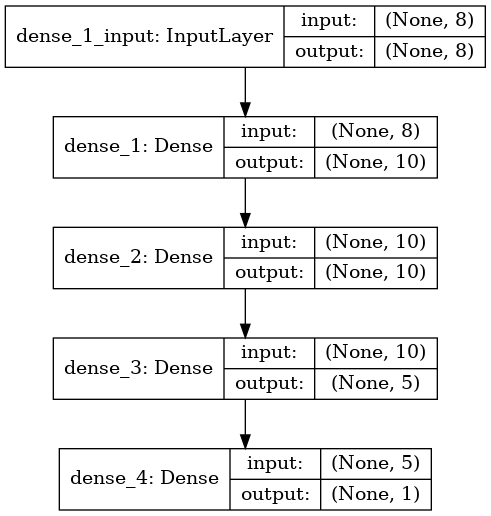

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image("model_plot.png")

In [8]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold

clf = KerasRegressor(build_fn=nn_clf, batch_size=32, epochs=50)
clf.fit(train_X, train_Y)

W0605 15:03:54.644017 140555512977216 deprecation_wrapper.py:118] From /home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0605 15:03:54.708122 140555512977216 deprecation_wrapper.py:118] From /home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/50
10320/10320 [==============================] - 0s 35us/step - loss: 2.1720 - mean_absolute_error: 1.0588 - mean_squared_error: 2.1720
Epoch 2/50
10320/10320 [==============================] - 0s 16us/step - loss: 0.4788 - mean_absolute_error: 0.5000 - mean_squared_error: 0.4788
Epoch 3/50
10320/10320 [==============================] - 0s 16us/step - loss: 0.4100 - mean_absolute_error: 0.4601 - mean_squared_error: 0.4100
Epoch 4/50
10320/10320 [==============================] - 0s 23us/step - loss: 0.3902 - mean_absolute_error: 0.4488 - mean_squared_error: 0.3902
Epoch 5/50
10320/10320 [==============================] - 0s 22us/step - loss: 0.3838 - mean_absolute_error: 0.4453 - mean_squared_error: 0.3838
Epoch 6/50
10320/10320 [==============================] - 0s 22us/step - loss: 0.3745 - mean_absolute_error: 0.4396 - mean_squared_error: 0.3745
Epoch 7/50
10320/10320 [==============================] - 0s 22us/step - loss: 0.3695 - mean_absolute_error: 0.4352 - mean_squared

MSE 0.589062555646373


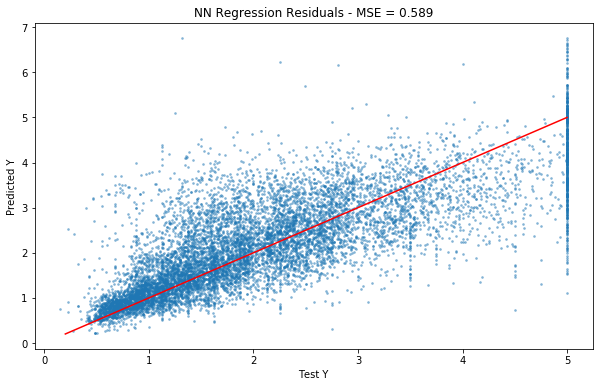

In [9]:
# how well did we do?
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_Y, clf.predict(test_X)) ; print("MSE",mse)

plt.figure(figsize=(10,6))
plt.title("NN Regression Residuals - MSE = %.3f" % mse)
plt.scatter(test_Y,clf.predict(test_X),alpha=0.4,s=3)
plt.xlabel("Test Y")
plt.ylabel("Predicted Y")
plt.plot([0.2,5],[0.2,5],c="r")

### A More Complete Example

We want to train and make some decisions of when to stop based on `validation` data. Ultimately, we'd like to see how well our model would do on truly new data (`test`).


In [10]:
train_percentage, valid_percentage, test_percentage = (0.90,0.05,0.05)

In [11]:
from sklearn.model_selection import train_test_split

rnd = np.random.RandomState(42)

# make an array with the indices of all the rows in the dataset
ind_arr = np.arange(X.shape[0])
rnd.shuffle(ind_arr)

train_ind, tmp = train_test_split(ind_arr, train_size=train_percentage, random_state=rnd)
valid_ind, test_ind = train_test_split(tmp, 
                                                          train_size=valid_percentage/(valid_percentage + test_percentage), 
                                                          random_state=rnd)

Let's make sure that we're getting all the indicies

In [12]:
assert np.all(np.array(sorted(list(train_ind) + list(valid_ind) + list(test_ind)))  == sorted(ind_arr))

Now let's scale the inputs

In [13]:
scaler = StandardScaler()  

train_X = X[train_ind]
# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  

# apply same transformation to test, validation data
test_X = scaler.transform(X[test_ind])
valid_X = scaler.transform(X[valid_ind])

train_y = Y[train_ind] ; test_y = Y[test_ind] ; valid_y = Y[valid_ind]

assert train_y.shape[0] == train_X.shape[0]
assert test_y.shape[0] == test_X.shape[0]
assert valid_y.shape[0] == valid_X.shape[0]

Run this little script (`reproduce.py`) to reset the random seeds, making the results reproducible.

In [14]:
%run reproduce.py

E0605 15:04:06.781196 140555512977216 execution.py:701] File `'reproduce.py'` not found.


In [15]:
from keras import backend as K
K.clear_session()
model = Sequential()
model.add(Dense(10, input_shape=(num_input_features,), 
                  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(10,  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(5,  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(1, activation="linear", kernel_initializer='random_uniform'))

The `Model.compile` method in `keras` has a number of input parameters:

```python
compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
```
Usually, you'll set the `optimizer`, `loss`, and `metrics`.

https://keras.io/models/model/

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae',"mse"])

In [18]:
import datetime
import os

from keras.callbacks import EarlyStopping, CSVLogger, \
                                                ReduceLROnPlateau, ModelCheckpoint, TensorBoard

try:
    os.mkdir('nn_results')
except:
    pass

batch_size=64
num_epochs = 200

run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')

# define path to save model
model_path = f'nn_results/colombia_nn_{run_time_string}.h5'
print(f"Training ... {model_path}")

# Tensorboard is a project which can ingest learning logs for interactive display...more on that later.
tb = TensorBoard(log_dir='nn_results', histogram_freq=0, batch_size=batch_size, 
                 write_graph=True, 
                 write_grads=False, 
                 write_images=False, 
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None, embeddings_data=None)

reduce_lr = ReduceLROnPlateau(monitor='val_mean_squared_error', factor=0.75,
                              patience=3, min_lr=1e-6, verbose=1, cooldown=0)

csv_logger = CSVLogger(f'nn_results/training_{run_time_string}.log')

earlystop = EarlyStopping(monitor='val_mean_squared_error', min_delta=0.001, patience=10, \
                          verbose=1, mode='auto')

model_check = ModelCheckpoint(model_path,
        monitor='val_mean_squared_error', 
        save_best_only=True, 
        mode='min',
        verbose=1)

Training ... nn_results/colombia_nn_2019-06-05T20:04.h5


The `Model.fit` method:

```python
fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)
```

In [19]:
history = model.fit(x=train_X, y=train_y,
               epochs=num_epochs,
               validation_data=(valid_X, valid_y),
               verbose=1, shuffle=True,
               callbacks=[csv_logger, earlystop, model_check, tb])

W0605 15:04:07.863622 140555512977216 deprecation_wrapper.py:118] From /home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0605 15:04:07.864118 140555512977216 deprecation_wrapper.py:118] From /home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Train on 18576 samples, validate on 1032 samples
Epoch 1/200
18576/18576 [==============================] - 0s 19us/step - loss: 1.8768 - mean_absolute_error: 0.9735 - mean_squared_error: 1.8768 - val_loss: 0.6414 - val_mean_absolute_error: 0.5718 - val_mean_squared_error: 0.6414

Epoch 00001: val_mean_squared_error improved from inf to 0.64139, saving model to nn_results/colombia_nn_2019-06-05T20:04.h5
Epoch 2/200
18576/18576 [==============================] - 0s 15us/step - loss: 0.5005 - mean_absolute_error: 0.5150 - mean_squared_error: 0.5005 - val_loss: 0.4985 - val_mean_absolute_error: 0.4932 - val_mean_squared_error: 0.4985

Epoch 00002: val_mean_squared_error improved from 0.64139 to 0.49847, saving model to nn_results/colombia_nn_2019-06-05T20:04.h5
Epoch 3/200
18576/18576 [==============================] - 0s 15us/step - loss: 0.4389 - mean_absolute_error: 0.4735 - mean_squared_error: 0.4389 - val_loss: 0.4594 - val_mean_absolute_error: 0.4797 - val_mean_squared_error: 0.4594

18576/18576 [==============================] - 0s 16us/step - loss: 0.3761 - mean_absolute_error: 0.4294 - mean_squared_error: 0.3761 - val_loss: 0.4076 - val_mean_absolute_error: 0.4413 - val_mean_squared_error: 0.4076

Epoch 00025: val_mean_squared_error did not improve from 0.40310
Epoch 26/200
18576/18576 [==============================] - 0s 16us/step - loss: 0.3764 - mean_absolute_error: 0.4305 - mean_squared_error: 0.3764 - val_loss: 0.4028 - val_mean_absolute_error: 0.4422 - val_mean_squared_error: 0.4028

Epoch 00026: val_mean_squared_error improved from 0.40310 to 0.40280, saving model to nn_results/colombia_nn_2019-06-05T20:04.h5
Epoch 27/200
18576/18576 [==============================] - 0s 16us/step - loss: 0.3744 - mean_absolute_error: 0.4294 - mean_squared_error: 0.3744 - val_loss: 0.4034 - val_mean_absolute_error: 0.4445 - val_mean_squared_error: 0.4034

Epoch 00027: val_mean_squared_error did not improve from 0.40280
Epoch 28/200
18576/18576 [==========================

18576/18576 [==============================] - 0s 16us/step - loss: 0.3228 - mean_absolute_error: 0.3925 - mean_squared_error: 0.3228 - val_loss: 0.3495 - val_mean_absolute_error: 0.4084 - val_mean_squared_error: 0.3495

Epoch 00075: val_mean_squared_error did not improve from 0.34759
Epoch 76/200
18576/18576 [==============================] - 0s 16us/step - loss: 0.3220 - mean_absolute_error: 0.3920 - mean_squared_error: 0.3220 - val_loss: 0.3481 - val_mean_absolute_error: 0.4080 - val_mean_squared_error: 0.3481

Epoch 00076: val_mean_squared_error did not improve from 0.34759
Epoch 77/200
18576/18576 [==============================] - 0s 16us/step - loss: 0.3190 - mean_absolute_error: 0.3911 - mean_squared_error: 0.3190 - val_loss: 0.3462 - val_mean_absolute_error: 0.3995 - val_mean_squared_error: 0.3462

Epoch 00077: val_mean_squared_error improved from 0.34759 to 0.34623, saving model to nn_results/colombia_nn_2019-06-05T20:04.h5
Epoch 78/200
18576/18576 [==========================

18576/18576 [==============================] - 0s 16us/step - loss: 0.3052 - mean_absolute_error: 0.3803 - mean_squared_error: 0.3052 - val_loss: 0.3339 - val_mean_absolute_error: 0.3890 - val_mean_squared_error: 0.3339

Epoch 00100: val_mean_squared_error did not improve from 0.32181
Epoch 101/200
18576/18576 [==============================] - 0s 16us/step - loss: 0.3055 - mean_absolute_error: 0.3803 - mean_squared_error: 0.3055 - val_loss: 0.3251 - val_mean_absolute_error: 0.3874 - val_mean_squared_error: 0.3251

Epoch 00101: val_mean_squared_error did not improve from 0.32181
Epoch 102/200
18576/18576 [==============================] - 0s 15us/step - loss: 0.3062 - mean_absolute_error: 0.3804 - mean_squared_error: 0.3062 - val_loss: 0.3206 - val_mean_absolute_error: 0.3885 - val_mean_squared_error: 0.3206

Epoch 00102: val_mean_squared_error improved from 0.32181 to 0.32061, saving model to nn_results/colombia_nn_2019-06-05T20:04.h5
Epoch 103/200
18576/18576 [=======================

In [20]:
!ls nn_results/

colombia_nn_2019-06-05T20:04.h5		  training_2019-06-05T20:04.log
events.out.tfevents.1559765047.boltzmann


Let's look at the history of the training results:

In [21]:
lastest_log_file = !ls -t1 nn_results/training* | head -1
hist_df = pd.read_csv(lastest_log_file[0])
hist_df

,epoch,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,0,1.876824,0.973535,1.876824,0.641391,0.571778,0.641391
1,1,0.500469,0.515002,0.500469,0.498475,0.493164,0.498475
2,2,0.438929,0.473518,0.438929,0.459415,0.479742,0.459415
3,3,0.426551,0.464863,0.426551,0.448352,0.473546,0.448352
4,4,0.421697,0.462015,0.421697,0.444651,0.469506,0.444651
5,5,0.419046,0.459789,0.419046,0.439993,0.458976,0.439993
6,6,0.413956,0.456301,0.413956,0.437433,0.457545,0.437433
7,7,0.409451,0.454027,0.409451,0.433795,0.463269,0.433795
8,8,0.405440,0.450848,0.405440,0.428497,0.456780,0.428497
9,9,0.403496,0.449448,0.403496,0.425140,0.457392,0.425140


This is also available in the return value from `.fit`:

In [22]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

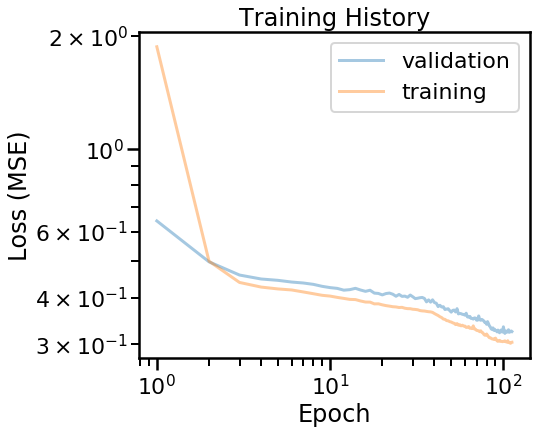

In [23]:
import seaborn as sns
sns.set_context("poster")
plt.figure(figsize=(7,6))
plt.title("Training History")
plt.plot(hist_df.index + 1,hist_df["val_mean_squared_error"] ,alpha=0.4, label="validation")
plt.plot(hist_df.index + 1,hist_df["mean_squared_error"] ,alpha=0.4, label="training")

plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.loglog()
plt.legend()

Take a look at the `tensorboard` notebook as well...

Let's take a look at the predictions on the test set

In [24]:
# reload the best model
from keras.models import load_model
import tensorflow as tf

model = load_model("nn_results/colombia_nn_2019-05-21T03:26.h5")

OSError: Unable to open file (unable to open file: name = 'nn_results/colombia_nn_2019-05-21T03:26.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
pred_y = model.predict(test_X)
pred_y

In [ ]:
# how well did we do?
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, pred_y); print("MSE",mse)

plt.figure(figsize=(10,6))
plt.title("NN Regression Residuals - MSE = %.3f" % mse)
plt.scatter(test_y,pred_y ,alpha=0.4,s=3)
plt.xlabel("Test Y")
plt.ylabel("Predicted Y")
plt.plot([0.2,5],[0.2,5],c="r")

How did we do compared to the validation and training data?